# StudentPerformance_GridSearchCrossValidation
This is a duplicate notebook from StudentPerformance_with_NN. In this notebook I will use Grid Search Cross Validation to search for optimum hyperparameter instead of doing it empirically in the previous notebook.

Hyperparameters Grid Search 101: 

https://elutins.medium.com/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

References: 

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### Index

1. Dataset
2. Packages Needed
3. Data Preprocessing
4. Grid Search Cross Validation
5. Inference
6. Some findings

## 1. Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Student+Performance

### Description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

### Note: In this notebook, I used the Dataset with Portuguese Language

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. 

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)* 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)


## 2. Packages Needed

In [239]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import MaxNorm

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
%matplotlib inline

### 3. Data Preprocessing

Here, I will find for empty data, encode categorical data, plot some graph to understand the data.

In [58]:
df = pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [59]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [60]:
# df.dtypes

In [61]:
# df.isnull().sum() 
# Check for missing data

In [62]:
features_list = list(df.columns)[:-1]
print("Features: {x}".format(x = features_list))
print("\nNumber of Features: {x}".format(x = len(features_list)))

Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Number of Features: 32


In [63]:
# df.info()
# # Check datatype of features

In [64]:
features = df.drop(["G3"], axis = 1)
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [65]:
target = df.drop(features_list, axis = 1)
target

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [66]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_guardian = {'mother' : 0, 'father' : 1, 'other': 2}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}

In [67]:
features['school'] = features['school'].map(mapping_school)
features['sex'] = features['sex'].map(mapping_sex)
features['address'] = features['address'].map(mapping_address)
features['famsize'] = features['famsize'].map(mapping_famsize)
features['Pstatus'] = features['Pstatus'].map(mapping_pstatus)
features['Mjob'] = features['Mjob'].map(mapping_mjob)
features['Fjob'] = features['Fjob'].map(mapping_fjob)
features['reason'] = features['reason'].map(mapping_reason)
features['guardian'] = features['guardian'].map(mapping_guardian).astype('Int64')
features['famsup'] = features['famsup'].map(mapping_famsup)
features['schoolsup'] = features['schoolsup'].map(mapping_schoolsup)
features['romantic'] = features['romantic'].map(mapping_romantic)
features['paid'] = features['paid'].map(mapping_paid)
features['activities'] = features['activities'].map(mapping_activities)
features['nursery'] = features['nursery'].map(mapping_nursery)
features['higher'] = features['higher'].map(mapping_higher)
features['internet'] = features['internet'].map(mapping_internet)


In [68]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,0,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11
645,1,0,18,0,1,1,3,1,4,3,0,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15
646,1,0,18,0,0,1,1,1,2,2,0,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12
647,1,1,17,0,1,1,3,1,3,3,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10


In [69]:
# features.dtypes

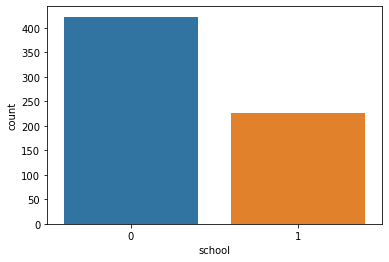

In [70]:
sns.countplot(x='school', data=features);

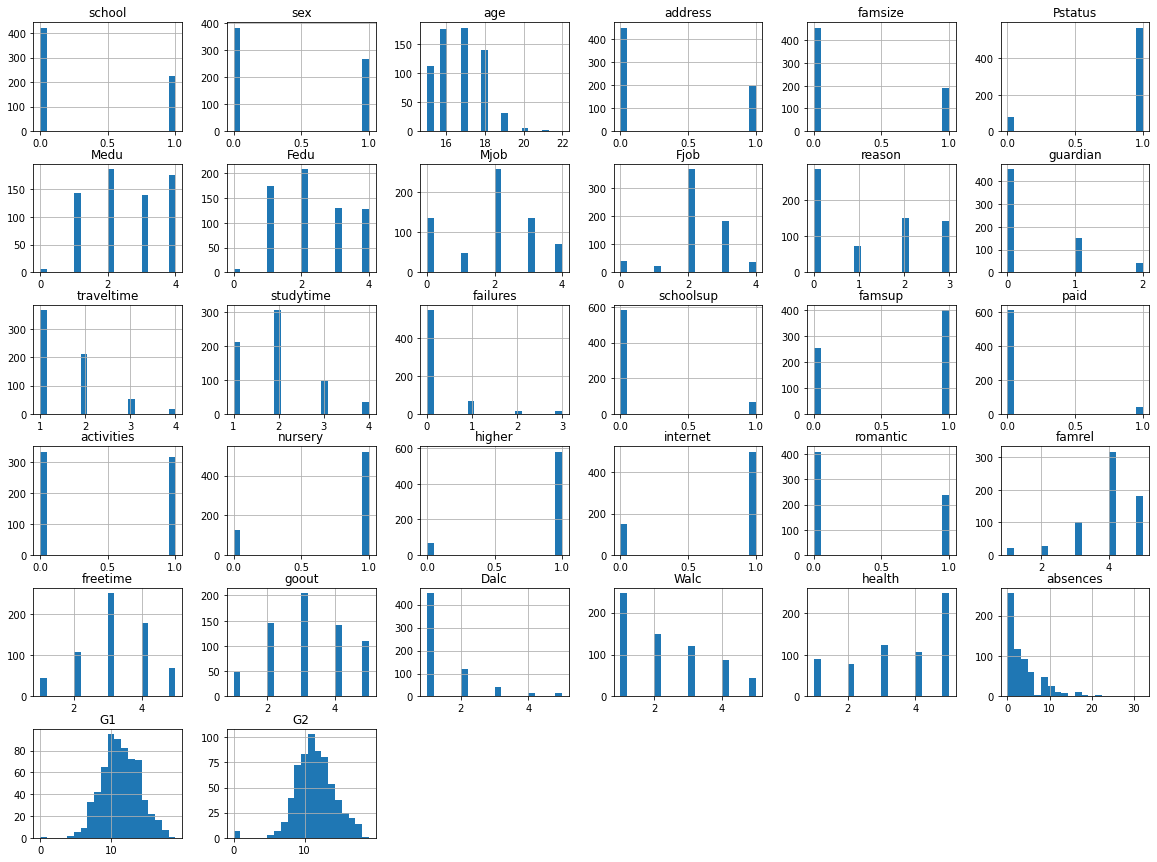

In [71]:
features.hist(bins=20, figsize=(20,15));

## 4. Grid Search Cross Validation

Here the real thing begins. We will use Sci-Kit Learn's GridSearchCV to find the optimal hypter parameters for the model for this problem.

#### To be tuned:

1. Batch Size & Number of Epochs with Training Optimization Algorithm
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

#### Search/Tuning Flow:
1. Define Model
2. Wrap Keras model with KerasRegressor of Sci-Kit Learn
3. Define Grid Parameters
4. Train model with Grid Parameters defined
5. Summarize Results

Note: Set verbose = 0, as it's gonna be long list.

#### Data normalization

In [120]:
x = features
y = target
scaler_x = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()
print(scaler_x.fit(x))
xscale =scaler_x.transform(x)
print(scaler_y.fit(y))
yscale =scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


#### Split Training and Testing data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.3)

In [76]:
# xscale, yscale

### Here we go!

### Batch Size & Number of Epochs with Training Optimization Algorithm 

1. ###### Batch Size & Number of Epochs with Training Optimization Algorithm (This section)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm 
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [125]:
def create_model(optimizer='adam'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
    
    #model.summary()
    
    return model

model = create_model()
model.summary()

Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1468 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_1469 (Dense)           (None, 64)                2112      
_________________________________________________________________
dense_1470 (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_1471 (Dense)           (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [126]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [127]:
# define the grid search parameters
batch_size = [10, 50]
epochs = [10, 50, 100, 200, 500, 700, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']


param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [128]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005965 using {'batch_size': 10, 'epochs': 500, 'optimizer': 'Adam'}
-0.028463 (0.004721) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-0.015968 (0.003097) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.025240 (0.003616) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adagrad'}
-0.015238 (0.002083) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
-0.017206 (0.002360) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
-0.145098 (0.191964) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
-0.022524 (0.001170) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
-0.146513 (0.190964) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
-0.157444 (0.202528) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
-0.011094 (0.000877) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'RMSprop'}
-0.020580 (0.002711) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adagrad'}
-0.010374 (0.0

Some reading on the negative values on scoring : 

https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

### Learning Rate

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. ###### Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (This section)
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [147]:
def create_model_Adam(learn_rate=0.001):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = learn_rate)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_Adam = KerasRegressor(build_fn=create_model_Adam, epochs=500, batch_size=10,  verbose=0)

In [148]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_Adam, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [149]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.008608 using {'learn_rate': 0.01}
-0.282835 (0.194689) with: {'learn_rate': 0.001}
-0.008608 (0.002567) with: {'learn_rate': 0.01}
-0.428273 (0.011470) with: {'learn_rate': 0.1}
-0.428273 (0.011470) with: {'learn_rate': 0.2}
-0.428273 (0.011470) with: {'learn_rate': 0.3}


### Network Weight Initialization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. ###### Network Weight Initialization(This section)
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer


In [150]:
def create_model_weight_init(init_mode = 'uniform'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer=init_mode),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_weight_init = KerasRegressor(build_fn=create_model_weight_init, epochs=500, batch_size=10, verbose=0)

In [151]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_weight_init, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [152]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.006276 using {'init_mode': 'glorot_normal'}
-0.007148 (0.001306) with: {'init_mode': 'uniform'}
-0.007395 (0.000859) with: {'init_mode': 'lecun_uniform'}
-0.007029 (0.002231) with: {'init_mode': 'normal'}
-0.428273 (0.011470) with: {'init_mode': 'zero'}
-0.006276 (0.001090) with: {'init_mode': 'glorot_normal'}
-0.006986 (0.001367) with: {'init_mode': 'glorot_uniform'}
-0.006326 (0.000991) with: {'init_mode': 'he_normal'}
-0.007320 (0.001293) with: {'init_mode': 'he_uniform'}


### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. ###### Neuron Activation Function (This section)
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

In [153]:
def create_model_act_func(activation='relu', output_activation = 'sigmoid'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer='glorot_normal'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_act_func = KerasRegressor(build_fn=create_model_act_func, epochs=500, batch_size=10, verbose=0)

In [154]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
output_activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation, output_activation=output_activation)
grid = GridSearchCV(estimator=model_act_func, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [155]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005240 using {'activation': 'tanh', 'output_activation': 'softplus'}
-0.163698 (0.006265) with: {'activation': 'softmax', 'output_activation': 'softmax'}
-0.007385 (0.000300) with: {'activation': 'softmax', 'output_activation': 'softplus'}
-0.007461 (0.001923) with: {'activation': 'softmax', 'output_activation': 'softsign'}
-0.428273 (0.011470) with: {'activation': 'softmax', 'output_activation': 'relu'}
-0.012566 (0.007980) with: {'activation': 'softmax', 'output_activation': 'tanh'}
-0.008226 (0.000539) with: {'activation': 'softmax', 'output_activation': 'hard_sigmoid'}
-0.015137 (0.012034) with: {'activation': 'softmax', 'output_activation': 'linear'}
-0.163698 (0.006265) with: {'activation': 'softplus', 'output_activation': 'softmax'}
-0.006287 (0.000951) with: {'activation': 'softplus', 'output_activation': 'softplus'}
-0.006516 (0.000858) with: {'activation': 'softplus', 'output_activation': 'softsign'}
-0.428273 (0.011470) with: {'activation': 'softplus', 'output_activ

### Dropout Regularization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. ###### Dropout Regularization (This section)
7. Number of Neurons in the Hidden Layer

### Check if the model is overfitting. 
If overfit --> add Dropout layer to regularize it, else skip having dropout layer(s).

In [159]:
def create_model_current(activation= 'tanh', output_activation = 'softplus'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer='glorot_normal'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_current = create_model_current()

In [234]:
history = model.fit(X_train, y_train, epochs=500, batch_size=10,  verbose=0, validation_split=0.2)

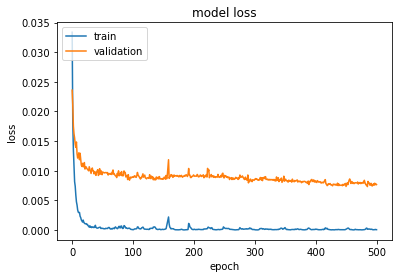

In [194]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [232]:
mean_squared_e = mean_squared_error(y_test, model.predict(X_test))
mean_absolute_e = mean_absolute_error(y_test, model.predict(X_test))

print("Mean Squared Error: {:.5f}".format(mean_squared_e))
print("Mean Absolute Error: {:.5f}".format(mean_absolute_e))

Mean Squared Error: 0.01027
Mean Absolute Error: 0.06792


Based on the graph, it's overfitting, hence, will use Dropout to regularize it.

In [247]:
def create_model_dropout(dropout_rate=0.0, weight_constraint=0):
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='tanh', 
              kernel_initializer='glorot_normal',
              kernel_constraint=MaxNorm(weight_constraint),
             ),
        Dense(64, activation='tanh'),
        Dropout(dropout_rate),
        Dense(32, activation='tanh'),
        Dense(1, activation='softplus')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_dropout = KerasRegressor(build_fn=create_model_dropout, epochs=500, batch_size=10, verbose=0)

In [248]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model_dropout, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [249]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005827 using {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.008765 (0.002131) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
-0.006575 (0.002795) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
-0.006673 (0.002291) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
-0.006450 (0.000443) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
-0.005827 (0.001479) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.013988 (0.007143) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
-0.007855 (0.001035) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
-0.009630 (0.006036) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
-0.008967 (0.001543) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
-0.007916 (0.003304) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.019527 (0.009681) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
-0.008429 (0.001298) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
-0.009075 (0.000833) with: {'dropout_rate': 0.2, 'weight

### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer(This section)

In [254]:
def create_model_neurons_hidden_layer(neurons_h_layer_1 = 1, neurons_h_layer_2 = 1):
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='tanh', 
              kernel_initializer='glorot_normal',
              kernel_constraint=MaxNorm(5),
             ),
        Dense(neurons_h_layer_1, activation='tanh'),
        Dense(neurons_h_layer_2, activation='tanh'),
        Dense(1, activation='softplus')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_neurons_hidden_layer = KerasRegressor(build_fn=create_model_neurons_hidden_layer, epochs=500, batch_size=10, verbose=0)

In [255]:
# define the grid search parameters
neurons_h_layer_1 = [8, 16, 32, 64, 128]
neurons_h_layer_2 = [16, 32, 64, 128]
param_grid = dict(neurons_h_layer_1=neurons_h_layer_1, neurons_h_layer_2=neurons_h_layer_2)
grid = GridSearchCV(estimator=model_neurons_hidden_layer, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [256]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005979 using {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 32}
-0.006768 (0.001340) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 16}
-0.005979 (0.001061) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 32}
-0.008095 (0.002254) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 64}
-0.006723 (0.001068) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 128}
-0.007194 (0.001230) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 16}
-0.006844 (0.001333) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 32}
-0.007062 (0.000690) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 64}
-0.152289 (0.206175) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 128}
-0.010299 (0.003803) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 16}
-0.007090 (0.000883) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 32}
-0.008150 (0.002697) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 64}
-0.143353 (0.193198) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2'

### Optimal Parameters

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. Dropout Regularization (dropout_rate: 0.0, weight_constraint: 5)
7. Number of Neurons in the Hidden Layer(First Hidden layer = 8, Second Hidden layer = 32)

#### Grid Searched CV's model

With the best parameter GridSearchCV could find based on given set of parameters grid. Now we instantiate a model and train it.

In [276]:
def create_mmodel_gridsearched():
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='tanh', 
              kernel_initializer='glorot_normal',
              kernel_constraint=MaxNorm(5),
             ),
        Dense(8, activation='tanh'),
        Dropout(0.3),
        Dense(32, activation='tanh'),
        Dense(1, activation='softplus')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
    
    return model

model_gridsearched = create_mmodel_gridsearched()

In [277]:
history_model_gridsearched = model_gridsearched.fit(X_train, y_train, epochs=500, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1357 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1037
Epoch 2/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1151 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1179
Epoch 3/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1098 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0844
Epoch 4/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182 - mae: 0.1035 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0909
Epoch 5/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0990 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0855
Epoch 6/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0894 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0676
Epoch 7/500
37/37 [===

37/37 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0512 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0434
Epoch 52/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0489 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0527
Epoch 53/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0553 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0473
Epoch 54/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0583 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0489
Epoch 55/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0756 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0576
Epoch 56/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0618 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0464
Epoch 57/500
37/37 [=========

37/37 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0420 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0510
Epoch 102/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0441 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0499
Epoch 103/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0439 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0521
Epoch 104/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0467 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0442
Epoch 105/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0471 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0489
Epoch 106/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0461 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0571
Epoch 107/500
37/37 [===

Epoch 151/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0507 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0544
Epoch 152/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0570 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0697
Epoch 153/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0468 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0475
Epoch 154/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0424 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0493
Epoch 155/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0496 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0560
Epoch 156/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0506 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0500
Epoch 157/

Epoch 201/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0450 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0493
Epoch 202/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0470 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0514
Epoch 203/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0430 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0520
Epoch 204/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0450 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0535
Epoch 205/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0409 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0557
Epoch 206/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0441 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0552
Epoch 207/

Epoch 251/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0494 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0617
Epoch 252/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0624 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0587
Epoch 253/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0595 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0523
Epoch 254/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0590 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0560
Epoch 255/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0708 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0819
Epoch 256/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0601 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0522
Epoch 257/

Epoch 301/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0512 - val_loss: 0.0077 - val_mse: 0.0077 - val_mae: 0.0580
Epoch 302/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0463 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0543
Epoch 303/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0586 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0849
Epoch 304/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0668 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0546
Epoch 305/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0590 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0701
Epoch 306/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0502 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0572
Epoch 307/

Epoch 351/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0434 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0559
Epoch 352/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0423 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0543
Epoch 353/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0420 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0575
Epoch 354/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0412 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0548
Epoch 355/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0391 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0546
Epoch 356/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0369 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0529
Epoch 357/

Epoch 401/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0379 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0551
Epoch 402/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0359 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0524
Epoch 403/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0393 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0501
Epoch 404/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0381 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0520
Epoch 405/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0421 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0569
Epoch 406/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0423 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0585
Epoch 407/

Epoch 451/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0432 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0684
Epoch 452/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0413 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0687
Epoch 453/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0426 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0634
Epoch 454/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0391 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0571
Epoch 455/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0379 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0567
Epoch 456/500
37/37 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0331 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0574
Epoch 457/

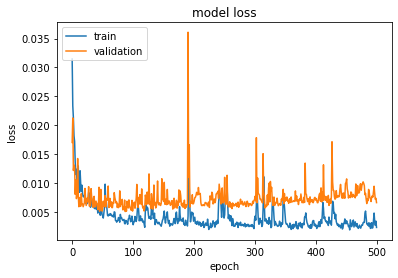

In [278]:
# print(history.history.keys())
plt.plot(history_model_gridsearched.history['loss'])
plt.plot(history_model_gridsearched.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Inference

In [305]:
df2 = features.iloc[644] # Test with the 14th Student 
Xnew = np.array([df2])
Xnew.reshape(-1, 1)

Xnew= scaler_x.transform(Xnew)
ynew= model_gridsearched.predict(Xnew)

# #invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)

#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted G3's score is {:.2f}".format(float(ynew)))

Predicted G3's score is 9.82


In [302]:
loss, mean_sq_e, mean_abs_e = model_gridsearched.evaluate(X_test, y_test, batch_size=10,verbose=0)
print("Mean Squared Error : {:.5f}".format(mean_sq_e))
print("Mean Absolute Error : {:.5f}".format(mean_abs_e))

Mean Squared Error : 0.00918
Mean Absolute Error : 0.05933


In [282]:
diff_list = []
large_diff_count = 0
for i in range(0,len(target)):
    print(i)
    df2 = features.iloc[i] # Test with the 14th Student 
    target2 = target.iloc[i].values[0]
    print("Real Values :", target2)
    Xnew = np.array([df2])
    Xnew.reshape(1, -1)
    Xnew= scaler_x.transform(Xnew)
    ynew= model_gridsearched.predict(Xnew)

    #invert normalize
    ynew = scaler_y.inverse_transform(ynew) 
    Xnew = scaler_x.inverse_transform(Xnew)
    
    predicted = float(ynew)
    #print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    print("Predicted G3's score is {:.2f}".format(predicted))
    diff = np.abs(predicted-target2)
    print("Difference : {:.3f}".format(diff))
    diff_list.append(diff)
    
    if diff > mean_abs_e:
        large_diff_count = large_diff_count + 1
print("\nNumber of predicted score that exceed Mean Abs Error : ",large_diff_count)

0
Real Values : 11
Predicted G3's score is 9.62
Difference : 1.382
1
Real Values : 11
Predicted G3's score is 11.30
Difference : 0.300
2
Real Values : 12
Predicted G3's score is 12.21
Difference : 0.209
3
Real Values : 14
Predicted G3's score is 14.90
Difference : 0.903
4
Real Values : 13
Predicted G3's score is 12.74
Difference : 0.260
5
Real Values : 13
Predicted G3's score is 12.33
Difference : 0.667
6
Real Values : 13
Predicted G3's score is 12.46
Difference : 0.542
7
Real Values : 13
Predicted G3's score is 12.20
Difference : 0.800
8
Real Values : 17
Predicted G3's score is 15.71
Difference : 1.289
9
Real Values : 13
Predicted G3's score is 12.85
Difference : 0.147
10
Real Values : 14
Predicted G3's score is 14.97
Difference : 0.971
11
Real Values : 13
Predicted G3's score is 11.75
Difference : 1.254
12
Real Values : 12
Predicted G3's score is 12.29
Difference : 0.290
13
Real Values : 13
Predicted G3's score is 12.22
Difference : 0.775
14
Real Values : 15
Predicted G3's score is 1

Predicted G3's score is 10.05
Difference : 1.050
126
Real Values : 11
Predicted G3's score is 11.53
Difference : 0.532
127
Real Values : 11
Predicted G3's score is 10.27
Difference : 0.729
128
Real Values : 15
Predicted G3's score is 15.56
Difference : 0.561
129
Real Values : 13
Predicted G3's score is 12.57
Difference : 0.431
130
Real Values : 12
Predicted G3's score is 11.51
Difference : 0.493
131
Real Values : 8
Predicted G3's score is 9.57
Difference : 1.566
132
Real Values : 11
Predicted G3's score is 10.83
Difference : 0.165
133
Real Values : 13
Predicted G3's score is 13.02
Difference : 0.023
134
Real Values : 12
Predicted G3's score is 11.73
Difference : 0.269
135
Real Values : 14
Predicted G3's score is 14.25
Difference : 0.245
136
Real Values : 11
Predicted G3's score is 9.60
Difference : 1.395
137
Real Values : 11
Predicted G3's score is 11.46
Difference : 0.461
138
Real Values : 11
Predicted G3's score is 11.38
Difference : 0.381
139
Real Values : 15
Predicted G3's score is

Predicted G3's score is 9.91
Difference : 0.086
252
Real Values : 13
Predicted G3's score is 12.74
Difference : 0.259
253
Real Values : 10
Predicted G3's score is 9.84
Difference : 0.163
254
Real Values : 10
Predicted G3's score is 9.58
Difference : 0.415
255
Real Values : 7
Predicted G3's score is 7.99
Difference : 0.992
256
Real Values : 8
Predicted G3's score is 9.57
Difference : 1.567
257
Real Values : 9
Predicted G3's score is 9.63
Difference : 0.626
258
Real Values : 15
Predicted G3's score is 15.55
Difference : 0.549
259
Real Values : 10
Predicted G3's score is 9.77
Difference : 0.231
260
Real Values : 11
Predicted G3's score is 10.79
Difference : 0.213
261
Real Values : 13
Predicted G3's score is 11.99
Difference : 1.014
262
Real Values : 8
Predicted G3's score is 9.45
Difference : 1.451
263
Real Values : 8
Predicted G3's score is 9.55
Difference : 1.550
264
Real Values : 10
Predicted G3's score is 10.21
Difference : 0.208
265
Real Values : 15
Predicted G3's score is 15.24
Diff

Predicted G3's score is 11.92
Difference : 1.921
380
Real Values : 13
Predicted G3's score is 13.77
Difference : 0.769
381
Real Values : 15
Predicted G3's score is 15.34
Difference : 0.341
382
Real Values : 11
Predicted G3's score is 12.72
Difference : 1.719
383
Real Values : 12
Predicted G3's score is 11.55
Difference : 0.449
384
Real Values : 10
Predicted G3's score is 10.32
Difference : 0.319
385
Real Values : 10
Predicted G3's score is 10.36
Difference : 0.355
386
Real Values : 15
Predicted G3's score is 15.74
Difference : 0.739
387
Real Values : 15
Predicted G3's score is 15.45
Difference : 0.455
388
Real Values : 12
Predicted G3's score is 11.77
Difference : 0.226
389
Real Values : 12
Predicted G3's score is 10.92
Difference : 1.082
390
Real Values : 14
Predicted G3's score is 14.51
Difference : 0.510
391
Real Values : 14
Predicted G3's score is 14.35
Difference : 0.348
392
Real Values : 15
Predicted G3's score is 15.01
Difference : 0.007
393
Real Values : 15
Predicted G3's score

Predicted G3's score is 12.21
Difference : 0.787
505
Real Values : 11
Predicted G3's score is 9.93
Difference : 1.067
506
Real Values : 10
Predicted G3's score is 9.57
Difference : 0.435
507
Real Values : 10
Predicted G3's score is 10.02
Difference : 0.024
508
Real Values : 9
Predicted G3's score is 9.61
Difference : 0.606
509
Real Values : 18
Predicted G3's score is 15.68
Difference : 2.318
510
Real Values : 17
Predicted G3's score is 15.72
Difference : 1.278
511
Real Values : 10
Predicted G3's score is 10.13
Difference : 0.132
512
Real Values : 7
Predicted G3's score is 7.50
Difference : 0.503
513
Real Values : 8
Predicted G3's score is 7.50
Difference : 0.500
514
Real Values : 7
Predicted G3's score is 7.51
Difference : 0.507
515
Real Values : 10
Predicted G3's score is 9.71
Difference : 0.293
516
Real Values : 16
Predicted G3's score is 15.68
Difference : 0.319
517
Real Values : 15
Predicted G3's score is 15.25
Difference : 0.255
518
Real Values : 8
Predicted G3's score is 7.51
Dif

Predicted G3's score is 9.43
Difference : 0.428
630
Real Values : 17
Predicted G3's score is 15.78
Difference : 1.224
631
Real Values : 12
Predicted G3's score is 12.17
Difference : 0.172
632
Real Values : 9
Predicted G3's score is 9.55
Difference : 0.546
633
Real Values : 14
Predicted G3's score is 14.69
Difference : 0.693
634
Real Values : 16
Predicted G3's score is 15.75
Difference : 0.246
635
Real Values : 9
Predicted G3's score is 9.59
Difference : 0.589
636
Real Values : 19
Predicted G3's score is 15.92
Difference : 3.083
637
Real Values : 0
Predicted G3's score is 8.53
Difference : 8.528
638
Real Values : 16
Predicted G3's score is 15.78
Difference : 0.223
639
Real Values : 0
Predicted G3's score is 0.61
Difference : 0.611
640
Real Values : 0
Predicted G3's score is 0.61
Difference : 0.611
641
Real Values : 15
Predicted G3's score is 15.57
Difference : 0.566
642
Real Values : 11
Predicted G3's score is 9.54
Difference : 1.462
643
Real Values : 10
Predicted G3's score is 9.55
Dif